# Лабораторная работа № 1 ML 
### Боровских Вадим, 932003
## Аренда велосипедов day.csv

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Загрузка датасета


In [29]:
df = pd.read_csv("day.csv", index_col = 0)
df=df.reset_index() 
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [30]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Число пропущенных значений в каждом атрибуте


In [32]:
missing_values = df.isnull().sum()
print("Число пропущенных значений по атрибутам:")
print(missing_values)

Число пропущенных значений по атрибутам:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Пропущенных значений нет, поэтому нам не придется преобразовывать данные.

### Описание набора данных

Bike Sharing Dataset

Этот датасет содержит информацию о прокате велосипедов. Данные охватывают информацию о количестве 
прокатов в зависимости от различных факторов, таких как дата, время, погодные условия и т.д.

Атрибуты:
- instant: Идентификатор записи
- dteday: Дата проката
- season: Сезон (1: весна, 2: лето, 3: осень, 4: зима)
- yr: Год (0: 2011, 1: 2012)
- mnth: Месяц (1 - 12)
- holiday: Является ли день праздничным (0: нет, 1: да)
- weekday: День недели (0 - 6)
- workingday: Является ли рабочим днем (0: нет, 1: да)
- weathersit: Погодные условия (1: чисто, 2: туман, 3: небольшой дождь/снег, 4: сильный дождь/снег)
- temp: Температура в Цельсиях
- atemp: Ощущаемая температура в Цельсиях
- hum: Влажность
- windspeed: Скорость ветра
- casual: Количество прокатов вне системы регистрации пользователей (нерегулярные пользователи)
- registered: Количество прокатов через систему регистрации пользователей (зарегистрированные пользователи)
- cnt: Общее количество прокатов (casual + registered)


### Построение pairplot для набора данных


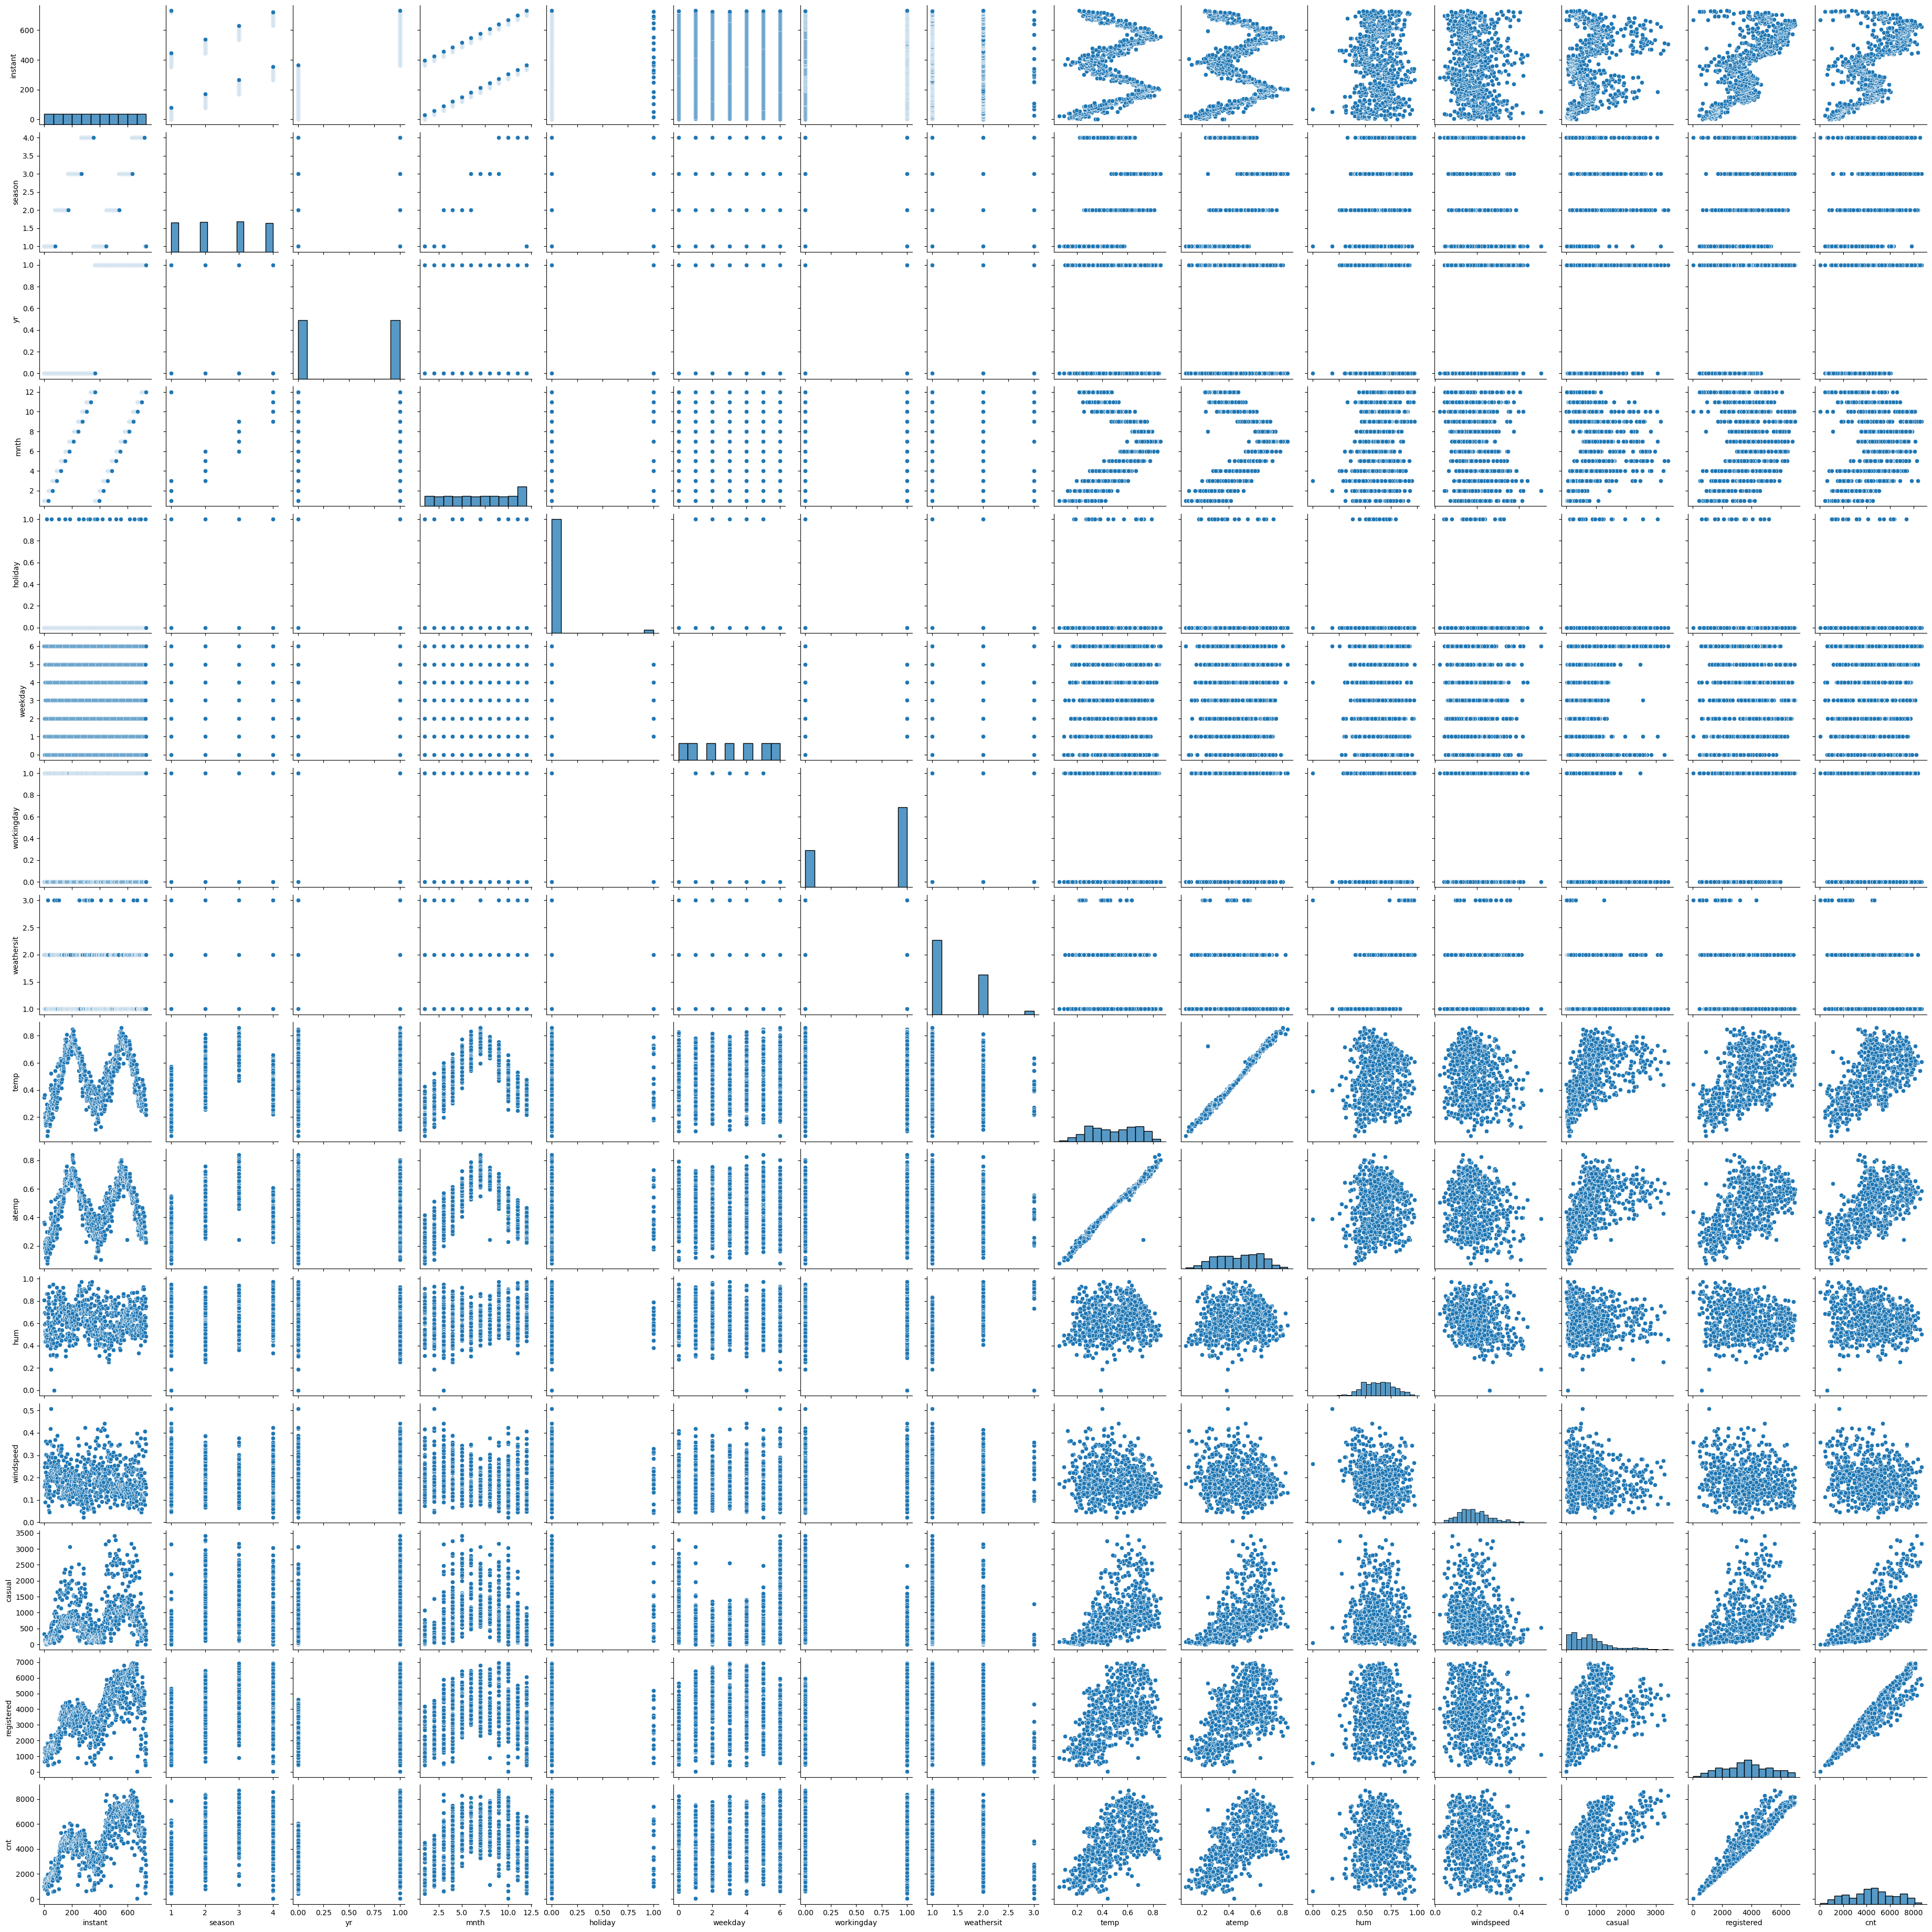

In [33]:
sns.pairplot(df)
plt.show()


### Выбор нескольких признаков с распределением значений и визуализация распределения


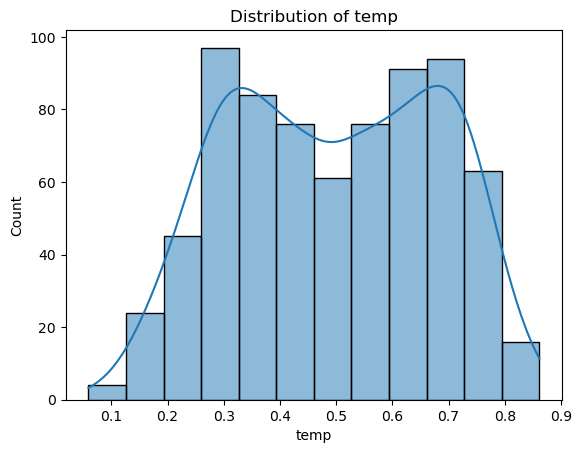

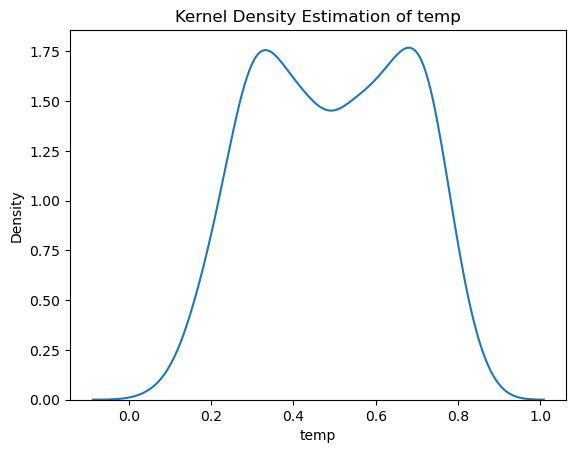

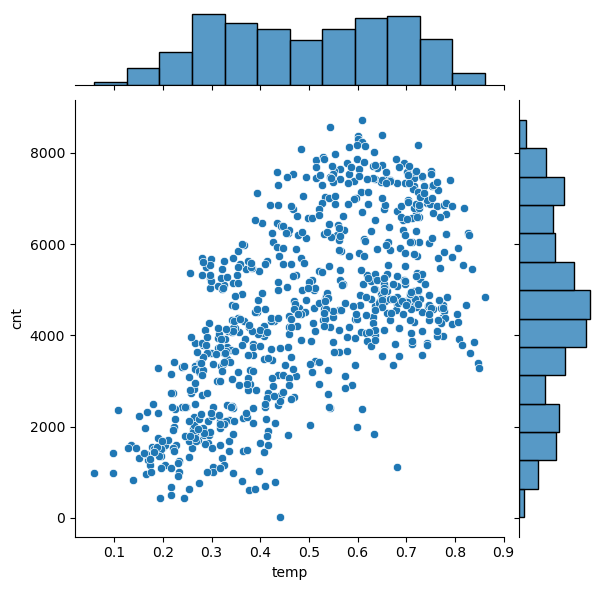

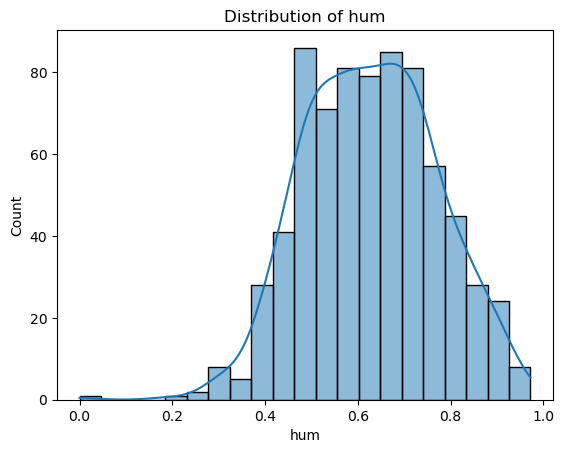

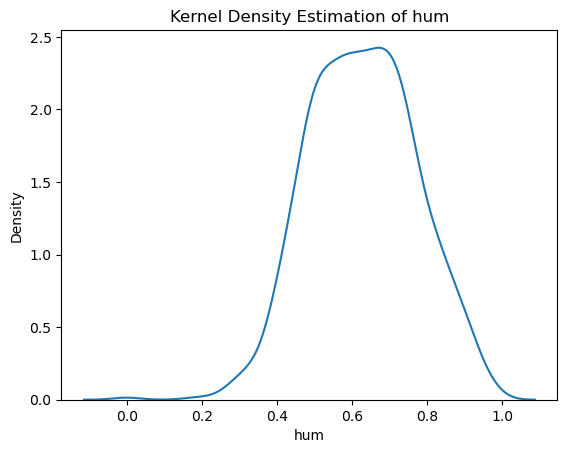

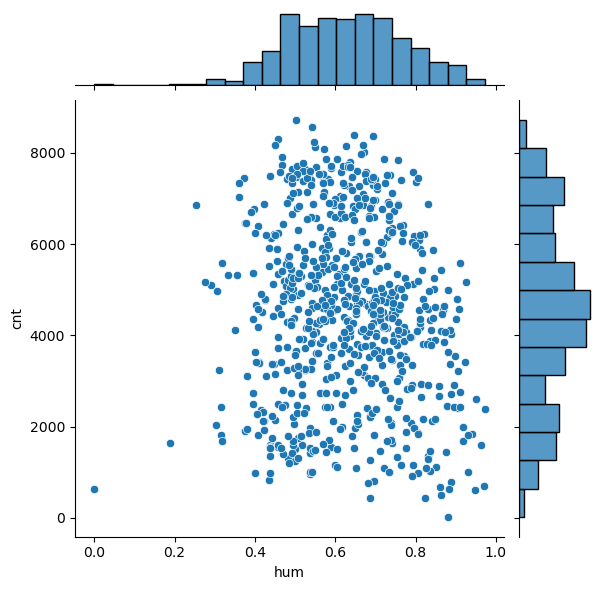

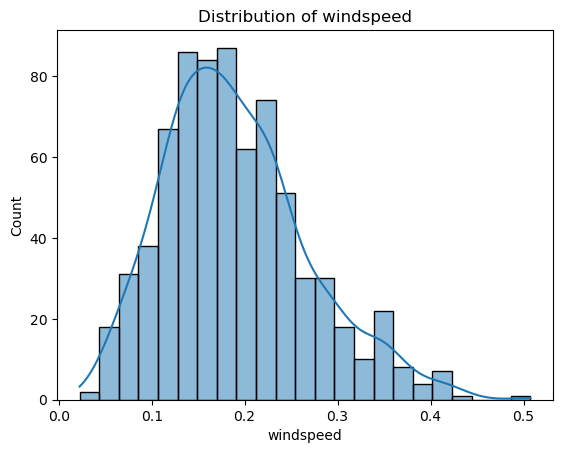

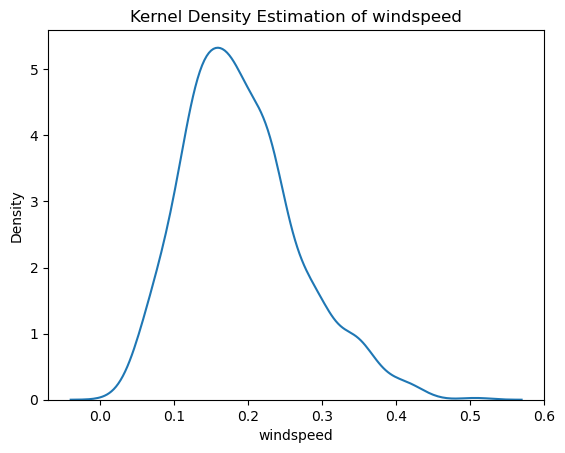

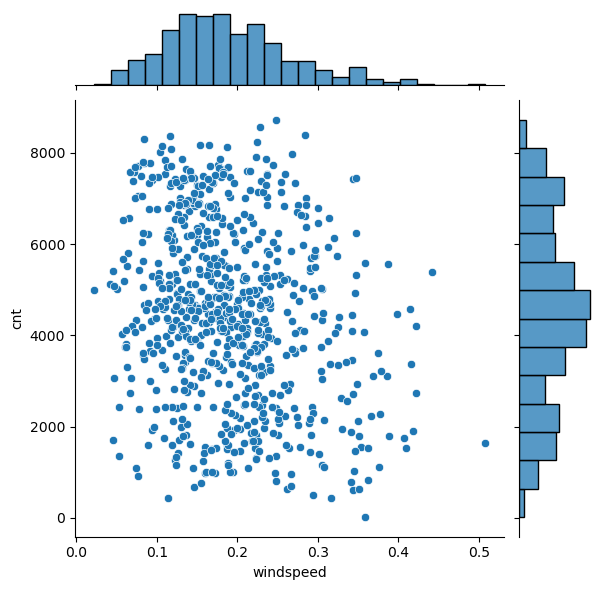

In [53]:
selected_features = ['temp', 'hum', 'windspeed']
for feature in selected_features:
  
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

    sns.kdeplot(df[feature])
    plt.title(f"Kernel Density Estimation of {feature}")
    plt.show()

    sns.jointplot(data=df, x=feature, y="cnt", kind="scatter")
    plt.show()

### Выбор части признаков и отображение корреляции между ними в виде тепловой карты


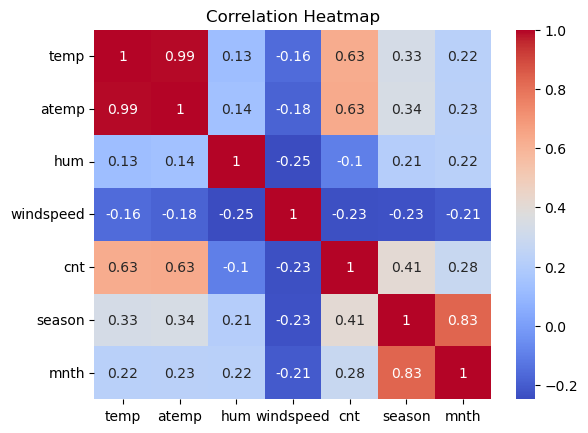

In [60]:
selected_attributes = ['temp', 'atemp', 'hum', 'windspeed', 'cnt','season','mnth']
correlation_matrix = df[selected_attributes].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Выбор трех признаков, целевой переменной и отображение графиков размаха


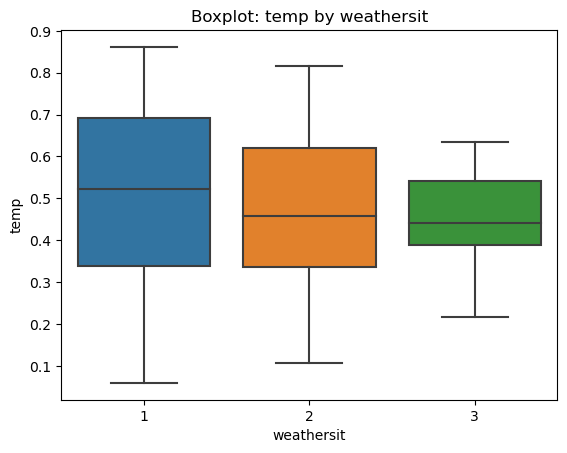

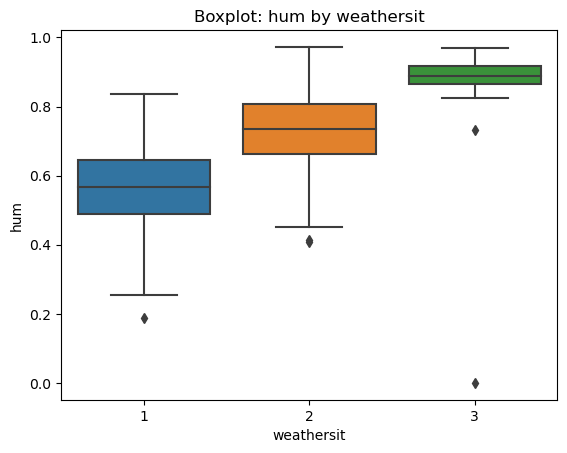

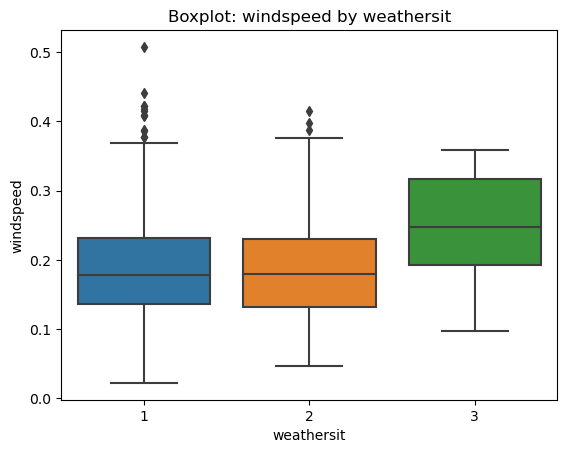

In [36]:
selected_features_boxplot = ['temp', 'hum', 'windspeed']
target_variable = 'weathersit'
for feature in selected_features_boxplot:
    sns.boxplot(data=df, x=target_variable, y=feature)
    plt.title(f"Boxplot: {feature} by {target_variable}")
    plt.show()

### Визуализация статистик для разных атрибутов


### Violinplot


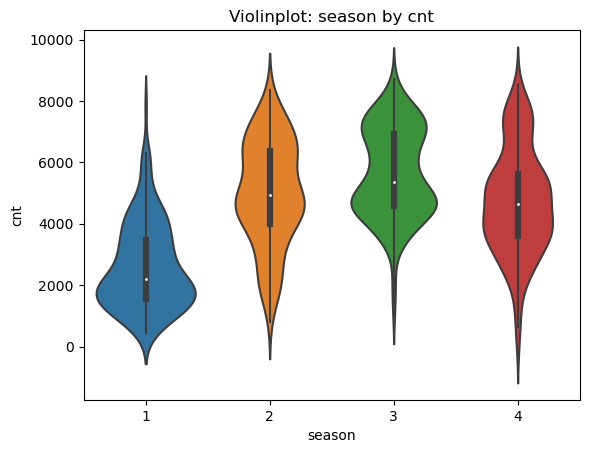

In [37]:
sns.violinplot(data=df, x="season", y="cnt")
plt.title("Violinplot: season by cnt")
plt.show()


### Stripplot


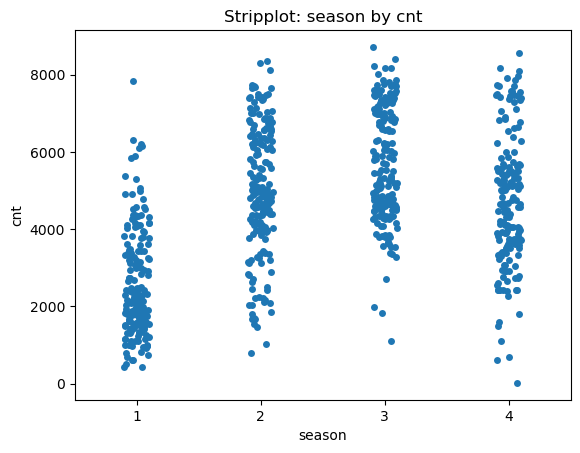

In [38]:
sns.stripplot(data=df, x="season", y="cnt")
plt.title("Stripplot: season by cnt")
plt.show()

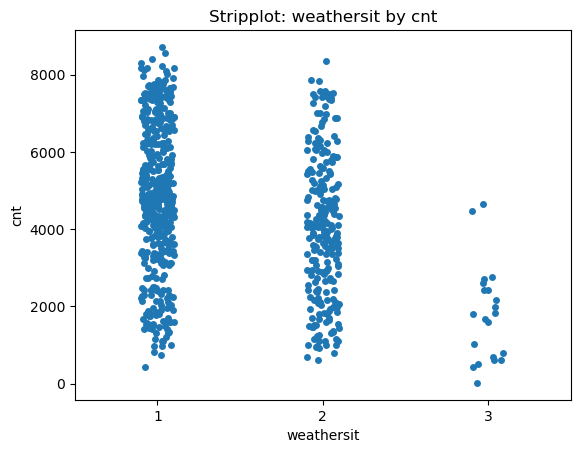

In [74]:
sns.stripplot(data=df, x="weathersit", y="cnt")
plt.title("Stripplot: weathersit by cnt")
plt.show()

### Swarmplot


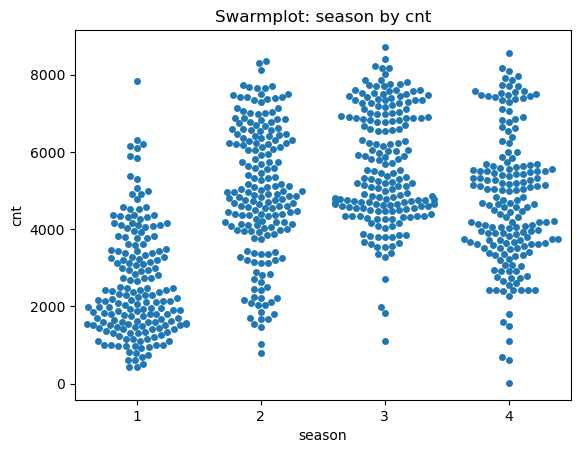

In [39]:
sns.swarmplot(data=df, x="season", y="cnt")
plt.title("Swarmplot: season by cnt")
plt.show()


D:\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


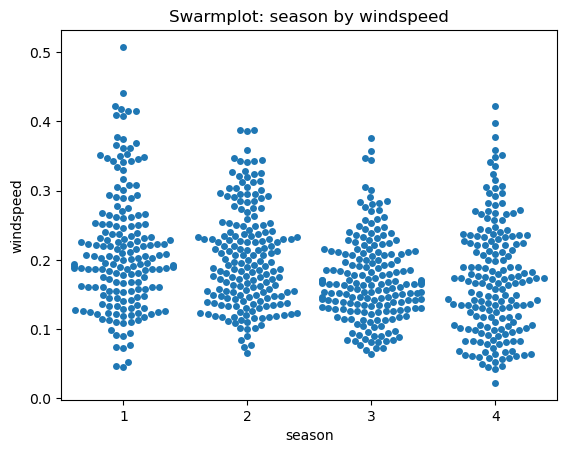

In [75]:
sns.swarmplot(data=df, x="season", y="windspeed")
plt.title("Swarmplot: season by windspeed")
plt.show()


### Pie chart

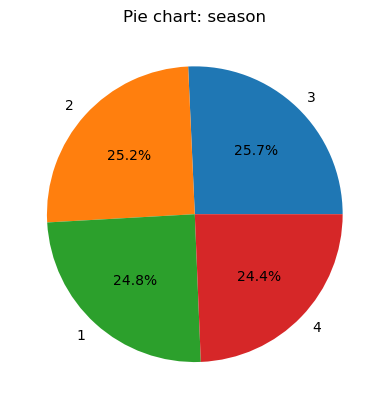

In [40]:
counts = df['season'].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Pie chart: season")
plt.show()

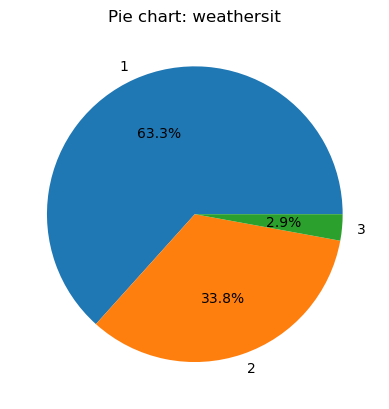

In [54]:
counts = df['weathersit'].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Pie chart: weathersit")
plt.show()

### Выводы:

Проведя исследовательский анализ данных о прокате велосипедов, можно выделить следующие интересные зависимости:

Температура (temp) имеет положительную корреляцию с общим количеством прокатов (cnt). При повышении температуры в диапазоне 0.3-0.7 увеличивается количество арендованных велосипедов. Но если слишко жарко от 0.8 или холодно 0 -0.2, то они сужественно снижаются.

Зависимость между влажностью (hum) и общим количеством прокатов (cnt), когда влажность средняя 0.4 - 0.8 наблюдается наибольшее количество прокатов. Но когда слишком сухо или влажно, наблюдается сущесственное падение прокатов.Можно сделать вывод, что средня влажность наиболее оптимальна для аренды велосипедов.

Наблюдается, что при низкой и средней скорости ветра 0-0.3 (windspeed) происходит большинство прокатов велосипедов.
Наблюдаются сезонные особенности в аренде велосипедов: летние месяцы имеют наибольшее количество прокатов, а весной наименьшое.

Также, наблюдается некоторое влияние погодных условий (weathersit) на аренду велосипедов. В чистую погоду и туманность наблюдается большинство прокатов, но приналичии небольшого и сильного количества осадков, прокатов нет, это может быть связанно с небольшой выборкой.